## Importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from textblob import TextBlob
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import missingno as msno
import re

## Libraries to be installed additionally - 
**1. missingno - pip install missingno**


## Reading the data.

In [2]:
data = pd.read_csv('Downloads/trump_20200530.csv')

In [3]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,RT @ScottAdamsSays: Malaria drug and zinc the ...,05-30-2020 03:26:31,10566,0,True,1266571665204527109
1,Twitter for iPhone,RT @YoungDems4Trump: In Democrat cities you ca...,05-30-2020 03:21:41,22320,0,True,1266570449431003138
2,Twitter for iPhone,RT @YoungDems4Trump: So sad. This poor busines...,05-30-2020 03:21:32,23961,0,True,1266570411678019584
3,Twitter for iPhone,Time for a change! #2020 https://t.co/AECy2GBfys,05-30-2020 03:20:18,42879,164022,False,1266570099454103553
4,Twitter for iPhone,RT @TallahForTrump: Trump spoke at my church i...,05-30-2020 03:19:01,36563,0,True,1266569778770182151


## Question 1 -

**It is an important skill to look at the data and come up with questions that you can answer. What are some compelling questions that you can ask with the provided dataset (list at least 2 questions)?**

- From the head() method we can infer that the column :-

    1. source         -      indicates the platform from which the tweet has been published (like andriod or iOS)
    2. text           -      is the tweet itself.
    3. created_at     -      the date and time of the tweet published.
    4. retweet_count  -      number of times the tweet has been retweeted.
    5. favorite_count -      the number of likes received by the tweet.
    6. is_retweet     -      is the tweet retweeted (True/False).
    7. id_str         -      id for each tweet.
    

 - By looking at the dataset I think we can come up with questions like :-
      - What was the overall sentiment of Trump's tweets during his presidency (given the timeperiod)?
      - Which user's tweets were mostly retweeted?
      - Which words did he use the most in his tweets?
      - Which tweet was most liked/retweeted?
      - In what year did he tweet the most?
      - In which year most of his tweets had a positive tone?
      - How are the tweets distributed over the given time frame? etc.

## Question 2 -

**a) Write code to inspect the data. What do you observe? Along with the code, write your observation in the markdown cell.**

In [4]:
data.shape

(18467, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18467 entries, 0 to 18466
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          18467 non-null  object
 1   text            18467 non-null  object
 2   created_at      18467 non-null  object
 3   retweet_count   18467 non-null  int64 
 4   favorite_count  18467 non-null  int64 
 5   is_retweet      18409 non-null  object
 6   id_str          18467 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1010.0+ KB


In [6]:
data.describe()

,retweet_count,favorite_count,id_str
count,18467.000000,18467.000000,1.846700e+04
mean,17753.247306,58623.881193,1.118379e+18
std,13060.852549,60661.448610,1.188340e+17
min,0.000000,0.000000,8.224214e+17
25%,9701.500000,0.000000,1.037514e+18
50%,15403.000000,57571.000000,1.156175e+18
75%,22469.000000,91086.500000,1.214196e+18
max,369530.000000,879647.000000,1.266572e+18


In [7]:
data.nunique()

source                8
text              18246
created_at        18053
retweet_count     14010
favorite_count    11561
is_retweet            2
id_str            18467
dtype: int64

In [8]:
print(data.isnull().sum())

source             0
text               0
created_at         0
retweet_count      0
favorite_count     0
is_retweet        58
id_str             0
dtype: int64


<Axes: >

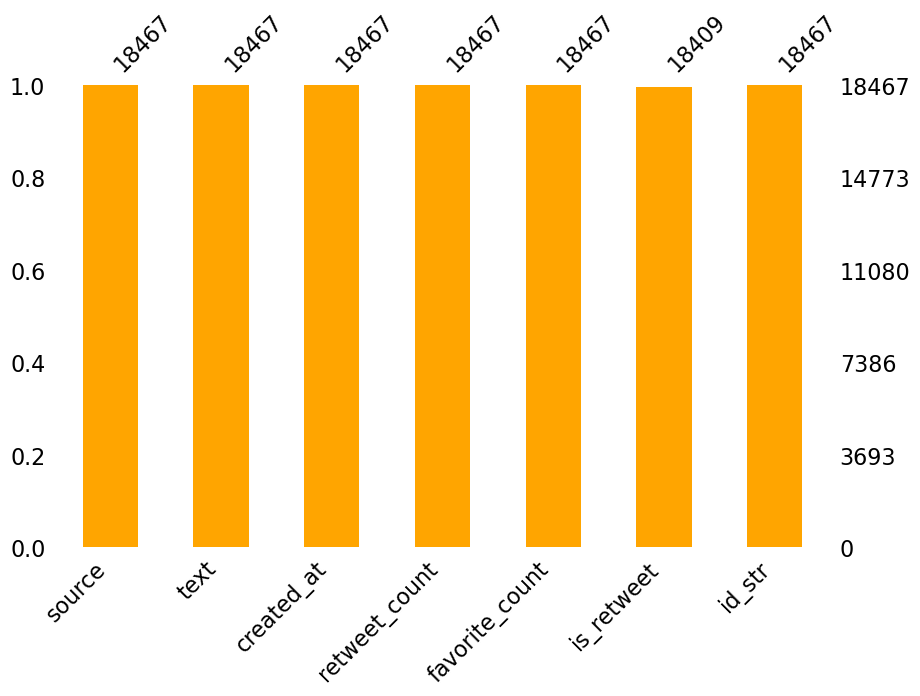

In [9]:
msno.bar(data, color='orange', figsize=(10,6))

**"missigno" is a python library that allows to provide a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe.**

**Observations -**

1. From the inspection above we can see that the dataset has 18467 rows and 7 columns.

2. From the describe() method we can see that the minimum value and standard deviation for the dataset is 0 and that is            acceptable.
    
3. Using the info() method we get to know the exact datatypes of each column in the dataset. 
    - We can observe that there are 3 columns of int datatype and 4 columns of object datatype.
    - Also the 'created_at' column indicates the date and time of the tweet published so it should be of the datatype-datetime.
      So it should be converted to (datetime) datatype instead of (object) datatype.
      
  
4. We can see the unique values present in each column using .nunique() method.
     
5. From the info() method we can also infer that the column 'is_retweet' has some missing values i.e 18409 values whereas the      remaining columns match the shape() result.
   Therefore we use isnull() method to extract the exact number of rows missing - 58.
   So we need to deal with these missing values as well.

## Question 2 -

**b) Clean: Write code to clean the data. Use at least 5 methods. For each method, along
 with the code, you need to write the rationale behind the cleaning process. For this
 question, you can assume that you are solving one of the questions that you wrote for
 the first question.**

**1. Converting the 'created_at' column from object datatype to datetime datatype.**

- Feature Engineering - 
    Each column should be associated to an appropriate datatype as it would affect the calculations and visualizations.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18467 entries, 0 to 18466
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          18467 non-null  object
 1   text            18467 non-null  object
 2   created_at      18467 non-null  object
 3   retweet_count   18467 non-null  int64 
 4   favorite_count  18467 non-null  int64 
 5   is_retweet      18409 non-null  object
 6   id_str          18467 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1010.0+ KB


In [11]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18467 entries, 0 to 18466
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source          18467 non-null  object        
 1   text            18467 non-null  object        
 2   created_at      18467 non-null  datetime64[ns]
 3   retweet_count   18467 non-null  int64         
 4   favorite_count  18467 non-null  int64         
 5   is_retweet      18409 non-null  object        
 6   id_str          18467 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1010.0+ KB


In [13]:
print(data['created_at'].min())
print(data['created_at'].max())

2017-01-20 12:31:53
2020-05-30 03:26:31


**As the problem statement said that it contains President Trump's tweets from the day he took office. We just made sure that the conversion didn't hinder our dataset's range.**

**2. Dealing with the missing values.**

In [14]:
print(data.isnull().sum())

source             0
text               0
created_at         0
retweet_count      0
favorite_count     0
is_retweet        58
id_str             0
dtype: int64


In [15]:
data.shape

(18467, 7)

In [16]:
data = data.dropna()

In [17]:
data.shape

(18409, 7)

- **The new shape of the dataframe after dropping the rows with null values.**

In [18]:
data.isnull().sum()

source            0
text              0
created_at        0
retweet_count     0
favorite_count    0
is_retweet        0
id_str            0
dtype: int64

- **As we can see we have 58 rows in the dataframe which have their 'is_retweet' column value as 'null'. Considering our dataset being large enough we can simply drop the rows having the null values.**

**3. Dropping irrelevant columns. (id_str)**
- I personally believe that as we are dealing with a dataset that has been produced from a single user and the column 'id_str' is irrelevant in this scenario. Because all of the tweets have been from a single user account, however they can be distinguished on thier published platform.

In [19]:
data = data.drop(['id_str'], axis=1)

In [20]:
data.shape

(18409, 6)

In [21]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet
0,Twitter for iPhone,RT @ScottAdamsSays: Malaria drug and zinc the ...,2020-05-30 03:26:31,10566,0,True
1,Twitter for iPhone,RT @YoungDems4Trump: In Democrat cities you ca...,2020-05-30 03:21:41,22320,0,True
2,Twitter for iPhone,RT @YoungDems4Trump: So sad. This poor busines...,2020-05-30 03:21:32,23961,0,True
3,Twitter for iPhone,Time for a change! #2020 https://t.co/AECy2GBfys,2020-05-30 03:20:18,42879,164022,False
4,Twitter for iPhone,RT @TallahForTrump: Trump spoke at my church i...,2020-05-30 03:19:01,36563,0,True


**4- Converting the tweet data (text column) in the dataframe to lowercase.**
 - As we would be mainly focusing on the tweets that is the the text column for    analyzing the sentiment as well as to perform other tasks on this tweet data.
   Therefore, we need this data to be consistent so that performing any other      tasks on this tweet data to be smooth.

In [22]:
data['text'] = data['text'].str.lower()

In [23]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet
0,Twitter for iPhone,rt @scottadamssays: malaria drug and zinc the ...,2020-05-30 03:26:31,10566,0,True
1,Twitter for iPhone,rt @youngdems4trump: in democrat cities you ca...,2020-05-30 03:21:41,22320,0,True
2,Twitter for iPhone,rt @youngdems4trump: so sad. this poor busines...,2020-05-30 03:21:32,23961,0,True
3,Twitter for iPhone,time for a change! #2020 https://t.co/aecy2gbfys,2020-05-30 03:20:18,42879,164022,False
4,Twitter for iPhone,rt @tallahfortrump: trump spoke at my church i...,2020-05-30 03:19:01,36563,0,True


**5- Removing all the special characters (including any url's) in the tweet data (text column).**
   - To analyze the sentiment from the tweets we need to clean the text.
   - Therefore, eliminating the special characters from the data.

**Dealing with URL's**

In [24]:
data['text'] = data['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

C:\Users\rtpn2\AppData\Local\Temp\ipykernel_21440\2485292843.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


**Dealing with the special characters**

In [25]:
data['text'] = data['text'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,:]", '')

C:\Users\rtpn2\AppData\Local\Temp\ipykernel_21440\2025530792.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,:]", '')


In [26]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet
0,Twitter for iPhone,rt scottadamssays malaria drug and zinc the mi...,2020-05-30 03:26:31,10566,0,True
1,Twitter for iPhone,rt youngdems4trump in democrat cities you can ...,2020-05-30 03:21:41,22320,0,True
2,Twitter for iPhone,rt youngdems4trump so sad this poor business o...,2020-05-30 03:21:32,23961,0,True
3,Twitter for iPhone,time for a change! 2020,2020-05-30 03:20:18,42879,164022,False
4,Twitter for iPhone,rt tallahfortrump trump spoke at my church in ...,2020-05-30 03:19:01,36563,0,True


**6 - Removing stopwords.**
 - Firstly, stopwords are the words which provide is the very low-level information about the tone of a sentence.
 - These must be removed in order to focus on the words which mainly decide for the tone of the statement especially in this      sentiment analysis problem.
 - We will be adding an extra stopword called 'rt' so as to emphasize on the      tweet ignoring any other stopwords and also we have a column called            ['is_retweet'] which tells us whether the tweet is a retweet or not.

In [27]:
extraStopword = ["rt"]

In [28]:
STOPWORDS = stopwords.words('english')

In [29]:
STOPWORDS.extend(extraStopword)

In [30]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data

,source,text,created_at,retweet_count,favorite_count,is_retweet
0,Twitter for iPhone,scottadamssays malaria drug zinc missing link ...,2020-05-30 03:26:31,10566,0,True
1,Twitter for iPhone,youngdems4trump democrat cities get arrested o...,2020-05-30 03:21:41,22320,0,True
2,Twitter for iPhone,youngdems4trump sad poor business owner lost e...,2020-05-30 03:21:32,23961,0,True
3,Twitter for iPhone,time change! 2020,2020-05-30 03:20:18,42879,164022,False
4,Twitter for iPhone,tallahfortrump trump spoke church detroit open...,2020-05-30 03:19:01,36563,0,True
...,...,...,...,...,...,...
18462,Twitter for iPhone,january 20th 2017 remembered day people became...,2017-01-20 17:53:17,60604,218555,False
18463,Twitter for iPhone,truly matters party controls government whethe...,2017-01-20 17:52:45,42790,180394,False
18464,Twitter for iPhone,power washington dc giving back american peopl...,2017-01-20 17:51:58,18362,91143,False
18465,Twitter for iPhone,today merely transferring power one administra...,2017-01-20 17:51:25,20125,109640,False


**Removing all the spaces.**

In [31]:
data['text'] = data['text'].str.strip()
data['text']

0        scottadamssays malaria drug zinc missing link ...
1        youngdems4trump democrat cities get arrested o...
2        youngdems4trump sad poor business owner lost e...
3                                        time change! 2020
4        tallahfortrump trump spoke church detroit open...
                               ...                        
18462    january 20th 2017 remembered day people became...
18463    truly matters party controls government whethe...
18464    power washington dc giving back american peopl...
18465    today merely transferring power one administra...
18466    begins today! see 1100 swearing-in movement co...
Name: text, Length: 18409, dtype: object

**Question 2 - Inspect and Data Cleaning.**

**c) Tokenize: Write code to tokenize your entire dataset. Use at least 2 different types of
 tokenizers. Compare their results and write your observations.**

 - **Using sentence tokenizer.**

In [32]:
sents = data['text'].apply(sent_tokenize)
sents

0        [scottadamssays malaria drug zinc missing link...
1        [youngdems4trump democrat cities get arrested ...
2        [youngdems4trump sad poor business owner lost ...
3                                     [time change!, 2020]
4        [tallahfortrump trump spoke church detroit ope...
                               ...                        
18462    [january 20th 2017 remembered day people becam...
18463    [truly matters party controls government wheth...
18464    [power washington dc giving back american peop...
18465    [today merely transferring power one administr...
18466    [begins today!, see 1100 swearing-in movement ...
Name: text, Length: 18409, dtype: object

 - **Using word tokenizer.**

In [33]:
words = data['text'].apply(word_tokenize)
words.value_counts()

[]                                                                                                                                                                                     516
[realdonaldtrump]                                                                                                                                                                       69
[thank, you, !]                                                                                                                                                                         42
[make, america, great, again, !]                                                                                                                                                        36
[whitehouse, live, press, briefing, coronavirus, task, force]                                                                                                                           29
                                                                 

**Comparing the results and observations.**
 - Firstly, sentence tokenizer is a tool that breaks the text into individual sentences whereas word tokenizer is a tool that      divides the entire text into words. (if the tweet would have had multiple sentences)
 - By applying sentence tokenizer, we are able to divide the text into individual sentences and we can analyze the tone of the    individual sentence instead of the whole tweet for more precision.
 - Whereas, by applying word tokenizer we could just figure out the most used words or least used words which could also help      us in analysis.
 - As we can see the most occuring word in the data is 'realdonaldtrump'. 


## Question 3- 
## Learn how to use new python packages or online APIs.
**Pick an existing package a library or an API to determine the sentiment (positive, negative,
neutral) for each of the tweets in the dataset. You can also use open-source code provided on
GitHub repos. DO NOT WRITE THE SENTIMENT ANALYSIS CODE FROM SCRATCH**


**About Textblob**
 - TextBlob is a powerful python library for natural language processing (NLP)    tasks, particularly sentiment analysis.
 - TextBlob assigns a sentiment score to a piece of text, indicating whether it    conveys positive, negative, or neutral sentiment.
 - ref - https://textblob.readthedocs.io/en/dev/classifiers.html

In [34]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [35]:
data['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in data['text']])

In [36]:
data

,source,text,created_at,retweet_count,favorite_count,is_retweet,sentiment
0,Twitter for iPhone,scottadamssays malaria drug zinc missing link ...,2020-05-30 03:26:31,10566,0,True,-1
1,Twitter for iPhone,youngdems4trump democrat cities get arrested o...,2020-05-30 03:21:41,22320,0,True,0
2,Twitter for iPhone,youngdems4trump sad poor business owner lost e...,2020-05-30 03:21:32,23961,0,True,-1
3,Twitter for iPhone,time change! 2020,2020-05-30 03:20:18,42879,164022,False,0
4,Twitter for iPhone,tallahfortrump trump spoke church detroit open...,2020-05-30 03:19:01,36563,0,True,0
...,...,...,...,...,...,...,...
18462,Twitter for iPhone,january 20th 2017 remembered day people became...,2017-01-20 17:53:17,60604,218555,False,0
18463,Twitter for iPhone,truly matters party controls government whethe...,2017-01-20 17:52:45,42790,180394,False,0
18464,Twitter for iPhone,power washington dc giving back american peopl...,2017-01-20 17:51:58,18362,91143,False,0
18465,Twitter for iPhone,today merely transferring power one administra...,2017-01-20 17:51:25,20125,109640,False,-1


## Question 4- Analyze Data Over Time.
**How does the sentiment of your corpus change over time? Answer this question by showing plots (at least 2 graphs). Be creative!**


**Adding ['month'] and ['year'] columns as we would be analyzing the data over time!**

In [37]:
months = data['created_at'].dt.month
data['month'] =  months
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,sentiment,month
0,Twitter for iPhone,scottadamssays malaria drug zinc missing link ...,2020-05-30 03:26:31,10566,0,True,-1,5
1,Twitter for iPhone,youngdems4trump democrat cities get arrested o...,2020-05-30 03:21:41,22320,0,True,0,5
2,Twitter for iPhone,youngdems4trump sad poor business owner lost e...,2020-05-30 03:21:32,23961,0,True,-1,5
3,Twitter for iPhone,time change! 2020,2020-05-30 03:20:18,42879,164022,False,0,5
4,Twitter for iPhone,tallahfortrump trump spoke church detroit open...,2020-05-30 03:19:01,36563,0,True,0,5


In [38]:
years = data['created_at'].dt.year
data['year'] =  years
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,sentiment,month,year
0,Twitter for iPhone,scottadamssays malaria drug zinc missing link ...,2020-05-30 03:26:31,10566,0,True,-1,5,2020
1,Twitter for iPhone,youngdems4trump democrat cities get arrested o...,2020-05-30 03:21:41,22320,0,True,0,5,2020
2,Twitter for iPhone,youngdems4trump sad poor business owner lost e...,2020-05-30 03:21:32,23961,0,True,-1,5,2020
3,Twitter for iPhone,time change! 2020,2020-05-30 03:20:18,42879,164022,False,0,5,2020
4,Twitter for iPhone,tallahfortrump trump spoke church detroit open...,2020-05-30 03:19:01,36563,0,True,0,5,2020


**Plotting the overall distribution of the tweets over the whole time period.**
 - We can say that there were more number of positive tweets considering as a whole.
 - This answers the question what is the overall tone of tweets posted by Trump given a time-period.

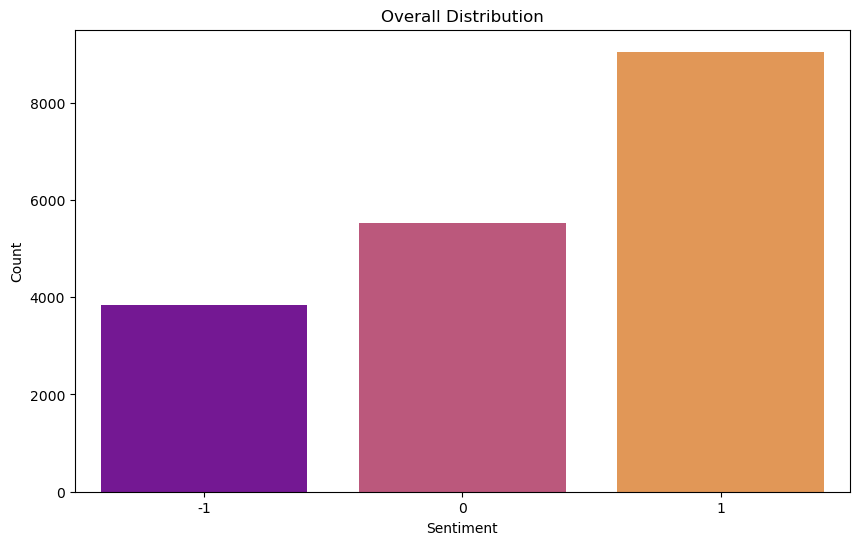

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, palette='plasma')
plt.title('Overall Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Plotting the sentiment distribution over the years.**
 - As seen earlier, there were lot more positive toned tweets comparatively than others and there were more negative toned        tweets in 2019 than positive toned tweets in 2017, 2018 and 2020.

In [40]:
grouped = data.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

In [41]:
colors = ['Purple', 'Gold', "Teal"]

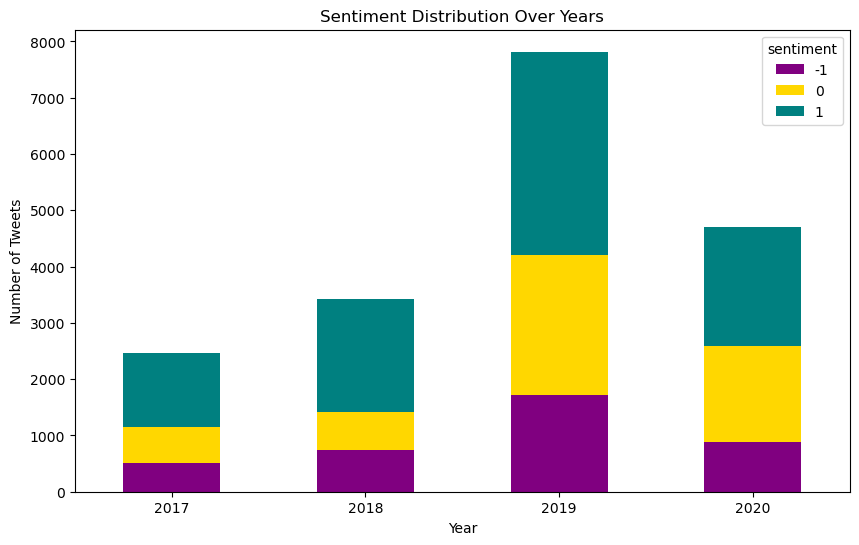

In [42]:
grouped.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)
plt.title('Sentiment Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

**Average sentiment over the months.**

In [43]:
average_sentiment_yearly = data.groupby('year')['sentiment'].mean()
average_sentiment_yearly

year
2017    0.324104
2018    0.370230
2019    0.243285
2020    0.261165
Name: sentiment, dtype: float64

**Average sentiment over the years. We are not able infer much about the tone therefore analyzing them monthly.**
**Ploting average sentiment over the months.**

In [44]:
data['yearly_Month']=data['created_at'].dt.to_period('M')
data['yearly_Month']

0        2020-05
1        2020-05
2        2020-05
3        2020-05
4        2020-05
          ...   
18462    2017-01
18463    2017-01
18464    2017-01
18465    2017-01
18466    2017-01
Name: yearly_Month, Length: 18409, dtype: period[M]

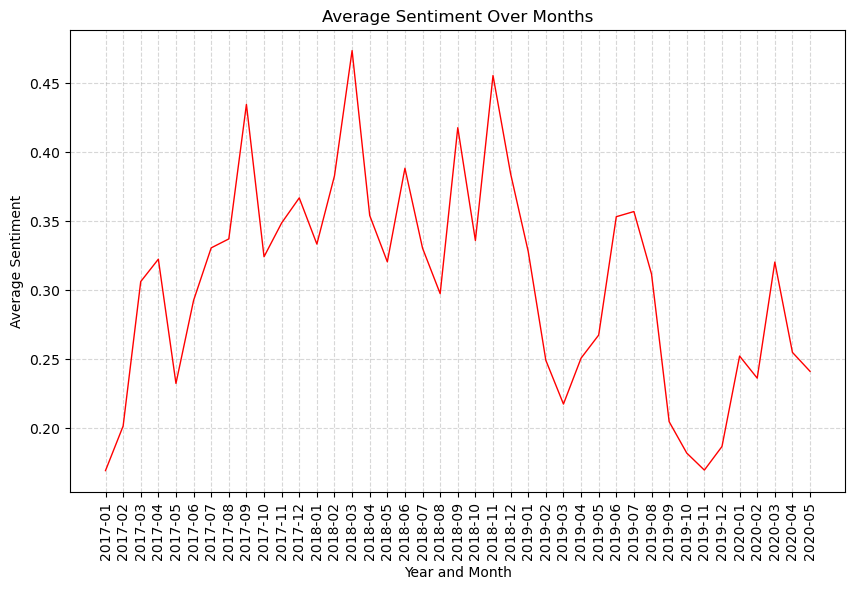

In [45]:
average_sentiment_monthly = data.groupby(['year', 'month'])['sentiment'].mean()

average_sentiment_monthly = average_sentiment_monthly.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_sentiment_monthly['year'] + average_sentiment_monthly['month'] / 12, average_sentiment_monthly['sentiment'], color='r', linewidth=1)
plt.xlabel('Year and Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Average Sentiment Over Months')
plt.xticks(average_sentiment_monthly['year'] + average_sentiment_monthly['month'] / 12, average_sentiment_monthly['year'].astype(str) + '-' + average_sentiment_monthly['month'].astype(str).str.zfill(2))
plt.show()

## Question 5- Drawing inference from the plots.

**From the plots we can infer that:**
 - First and foremost we can answer the main question that how was the            sentiment of the tweets given a particular time period. Sentiment analysis      over the time can reveal trends in the emotional tone of the text data ie      tweets.
 - We can say that most of his tweets in the given timeframe were positive        toned according to my sentiment analysis.
 - Comparatively, there were less neutral tweets and even lesser negative          toned tweets.
 - Tweet frequency patterns can highlight periods of high and low activity.
 - We can infer some things about tweet frequency like he was active the most      in the year 2019 irrespective of the tone of the tweets.
 - Also we can see that the most of positive toned tweets were also in the        year 2019.
 - We have even compared the sentiment categories over the years and changes      in sentiment level could reflect public sentiment towards a particular          topic.
 - From the last plot we can see the variation in mean sentiment over the months in a given time frame.
 - We can see the peak in mean sentiment in the begining of the year 2018 and even in the end there might be a chance of          political event or so, that might have led to this variaton.